# Convolution Neural Networks



<center><img src="https://viso.ai/wp-content/uploads/2021/04/convolution-neural-network-cnn-concept-1.jpg" alt="Drawing" style="width: 500px; height: 250px;" /></center>

<div style="text-align: right"> 
  <small>https://viso.ai/</small>
</div>




## Learning Objectives

1. [CNN implementation](#CNN-Implementation)



## What are Convolution Neural Networks?

A Convolutional Neural Network (CNN) is a specialized deep learning algorithm predominantly used for processing and recognizing images. Its design allows it to effectively identify patterns at various complexity levels in spatial data. Let's explore its main components and an example architecture as shown below,




<center><img src="https://editor.analyticsvidhya.com/uploads/183560_qcMBDPuKpDvICcdd.png" alt="Drawing" /></center>

<div style="text-align: right"> 
  <small>www.analyticsvidhya.com</small>
</div>




1. **Convolutional Layer:** Its primary purpose is to extract features from input images by applying numerous filters, each of which traverses the image, calculating the dot product between the filter and the corresponding image area, resulting in feature maps that emphasize different aspects such as edges or textures.

2. **Activation Layer:** It introduces non-linear elements to the model, which is essential since real-world data is typically non-linear, by implementing an activation function like ReLU on each component of the feature map, often turning negative values to zero.

3. **Pooling Layer:** This layer aims to reduce the spatial size (width and height) of the input for the subsequent layer by condensing information in a region (for instance, selecting the maximum value in a 2x2 area) to produce a more compact representation, resulting in a downscaled version of the feature map.

4. **Fully Connected Layer:** It performs the task of classification or regression using the extracted features, where the neurons in this layer are fully connected to all activations from the preceding layer, similar to standard neural networks, and typically produce a class score or a regression output.

5. **Softmax or Logistic Layer (for classification tasks):** The objective here is to calculate the probability distribution across various classes by transforming the output scores into probability values, resulting in probability values for each class.

## Using CNN for Image Classification

#### Load the module

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2023-11-14 08:16:37.415530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/akoneru/bin/conda_arjuna/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Load and Prepare Data for training 

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

#### Initialise model, define hyperparamters

In [3]:
# Building the CNN
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:], activation='relu'))
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout
model.add(Dropout(0.25))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 classes

# Compile the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Model Summary

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

#### Callbacks for model training

Configures the model for training by specifying loss, optimizer, metrics to track

In [5]:
checkpoint = ModelCheckpoint("cifar10_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
# Training the CNN

history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels), callbacks=[checkpoint, early_stopping])

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.5048 - accuracy: 0.4520
Epoch 1: val_accuracy improved from -inf to 0.57180, saving model to cifar10_model.h5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5048 - accuracy: 0.4520 - val_loss: 1.2092 - val_accuracy: 0.5718
Epoch 2/10
   1/1563 [..............................] - ETA: 1:44 - loss: 0.9390 - accuracy: 0.7188

/Users/akoneru/bin/conda_arjuna/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - ETA: 0s - loss: 1.1798 - accuracy: 0.5826
Epoch 2: val_accuracy improved from 0.57180 to 0.64020, saving model to cifar10_model.h5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1798 - accuracy: 0.5826 - val_loss: 1.0495 - val_accuracy: 0.6402
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 1.0601 - accuracy: 0.6240
Epoch 3: val_accuracy improved from 0.64020 to 0.66190, saving model to cifar10_model.h5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0601 - accuracy: 0.6240 - val_loss: 0.9627 - val_accuracy: 0.6619
Epoch 4/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.9813 - accuracy: 0.6547
Epoch 4: val_accuracy improved from 0.66190 to 0.69440, saving model to cifar10_model.h5
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9814 - accuracy: 0.6547 - val_loss: 0.8809 - val_accuracy: 0.6944
Epoch 5/10
1562/1563 [=======================

#### Plot Training and validation loss

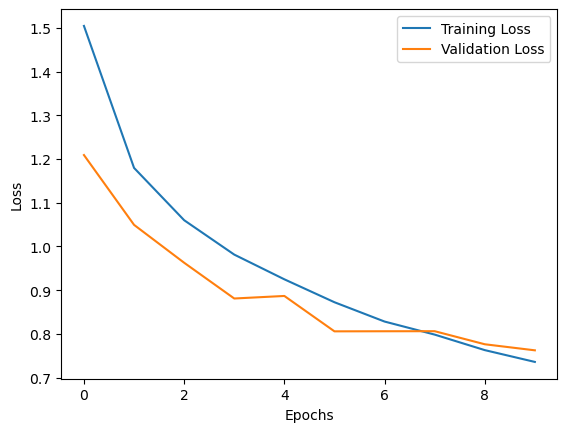

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Some important metrics

Confusion Matrix:
- The confusion matrix provides a breakdown of predictions into 4 categories:
  - True Positives (TP): Samples correctly predicted as positive 
  - True Negatives (TN): Samples correctly predicted as negative
  - False Positives (FP): Negative samples incorrectly predicted as positive
  - False Negatives (FN): Positive samples incorrectly predicted as negative
- This gives insight into the types of errors the model is making and whether it is confusing two particular classes.
- Metrics like accuracy, precision, recall can be calculated from the confusion matrix values.

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

test_labels = np.argmax(test_labels, axis=1)
matrix = confusion_matrix(test_labels, y_pred_classes)


313/313 [==============================] - 3s 9ms/step


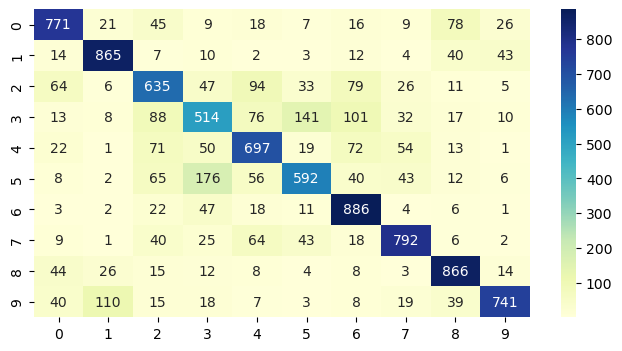

In [9]:
import seaborn as sns
plt.figure(figsize = (8,4))
ax = sns.heatmap(matrix, annot=True, cmap="YlGnBu", fmt='g')

Classification Report:
- Provides precision, recall, F1-score for each class. Gives a sense of model performance per class.
- Precision is TP/(TP + FP) - how many predicted positive are actually positive
- Recall is TP/(TP + FN) - how many actual positive are correctly predicted
- F1-score combines precision and recall into a single metric.



In [11]:
from sklearn.metrics import classification_report
classification_metrics = classification_report(test_labels, y_pred_classes)
print(f"Classification Report: \n{classification_metrics}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.83      0.86      0.85      1000
           2       0.63      0.64      0.63      1000
           3       0.57      0.51      0.54      1000
           4       0.67      0.70      0.68      1000
           5       0.69      0.59      0.64      1000
           6       0.71      0.89      0.79      1000
           7       0.80      0.79      0.80      1000
           8       0.80      0.87      0.83      1000
           9       0.87      0.74      0.80      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000

